<a href="https://colab.research.google.com/github/BrianChegeGichau/TimeSeries/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
train.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [4]:
test = pd.read_csv("test.csv")
test.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [5]:
oil = pd.read_csv("oil.csv")
oil.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [6]:
stores = pd.read_csv("stores.csv")
stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [7]:
transactions = pd.read_csv("transactions.csv")
transactions.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [8]:
holidays_events = pd.read_csv("holidays_events.csv")
holidays_events.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


## Data Understanding & Preparation

In [9]:
d_f = [train,test]
df = pd.concat(d_f)
df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [10]:
train.shape

(3000888, 6)

In [11]:
test.shape

(28512, 5)

In [12]:
df.shape

(3029400, 6)

In [13]:
stores.shape

(54, 5)

In [14]:
df.tail(2)

,id,date,store_nbr,family,sales,onpromotion
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9
28511,3029399,2017-08-31,9,SEAFOOD,NaN,0


In [15]:
stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [16]:
stores['store_nbr'].nunique()

54

In [17]:
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales          28512
onpromotion        0
dtype: int64

In [18]:
 #Checking for duplicated rows in our dataset
df.duplicated().any()
#There are no dupliacted rows in our dataset

False

In [19]:
df['store_nbr'].nunique()

54

In [20]:
df['family'].nunique()

33

In [10]:
from datetime import datetime

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [12]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1


In [13]:
df2 = df.merge(stores, how='left', on = 'store_nbr')

#### Look into it

In [ ]:
df3 = df2.merge(transactions, how='left', on = 'store_nbr')

## Data Analysis

In [20]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


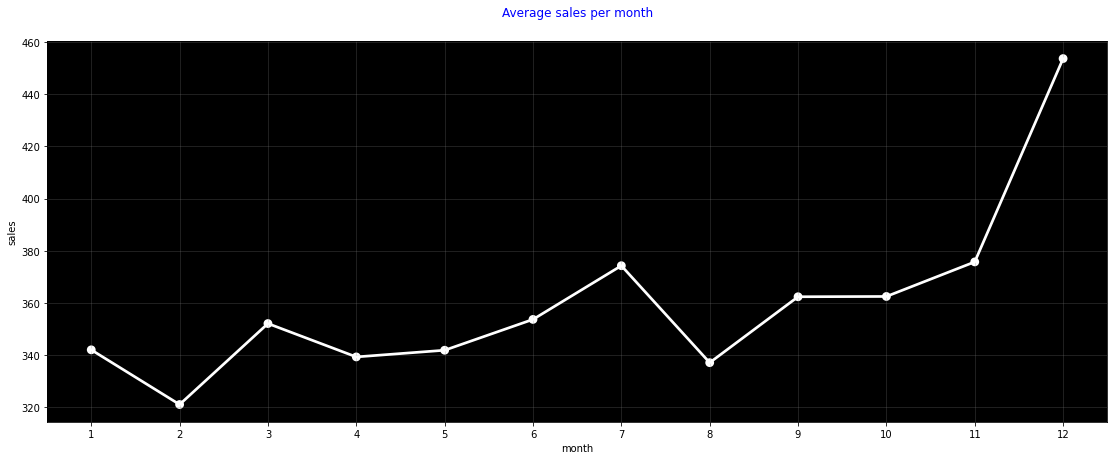

In [22]:
sales = df.groupby('month')['sales'].mean().reset_index()
# Setting the figure size of the plot to 19 by 7
plt.figure(figsize=(19,7))
# Plotting a pointplot to show the trend of average price across the years
ax = sns.pointplot(sales.month,sales.sales,color="w") 
# setting the background color to black, for contrast
ax.set_facecolor("k") 
plt.grid(True,color="grey",alpha=.3)
plt.title("Average sales per month",color='b', y = 1.05) 
plt.show()

In [24]:
df2.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,Quito,Pichincha,D,13


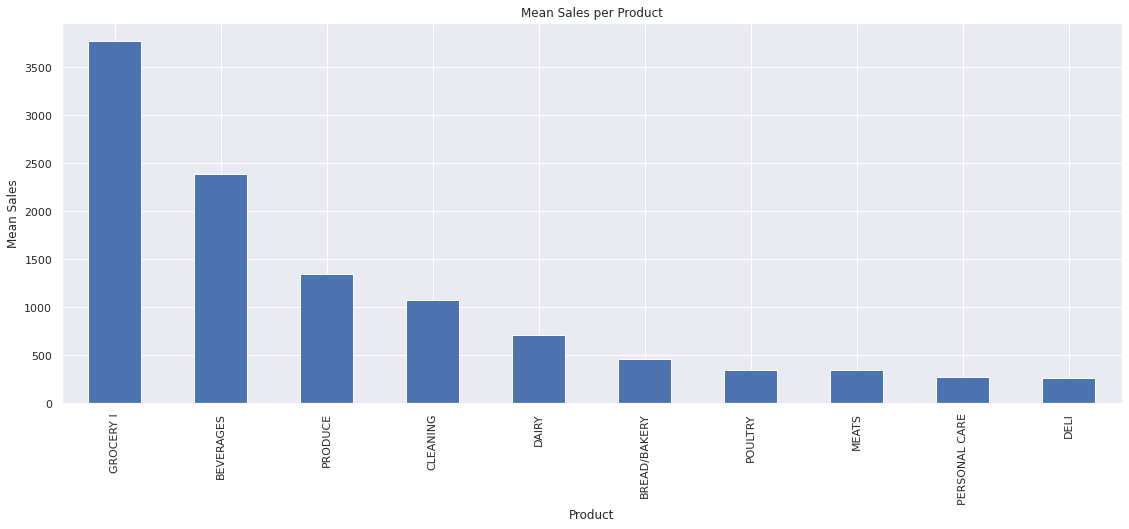

In [42]:
plt.figure(figsize=(19,7))
df2.groupby("family")['sales'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Mean Sales')
plt.title('Mean Sales per Product')
plt.show()

In [40]:
transactions.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [14]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
df3 = df2.merge(holidays_events, how='left', on = 'date')

In [15]:
df3.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [16]:
df3['type_y'].nunique()

6

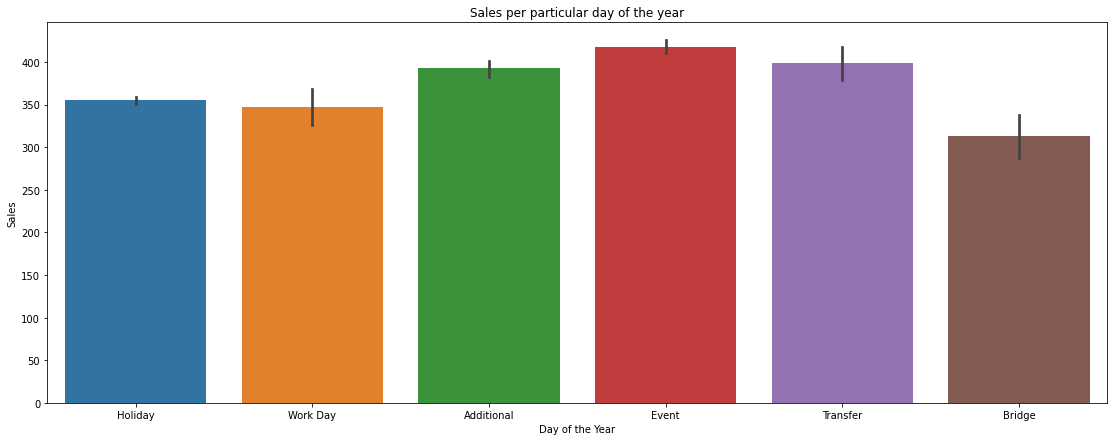

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
plt.figure(figsize=(19,7))
df_2 = df3.groupby('sales').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df3['type_y'], y = df['sales'], data=df_2)
plt.xlabel('Day of the Year')
plt.ylabel('Sales')
plt.title('Sales per particular day of the year')
plt.show()

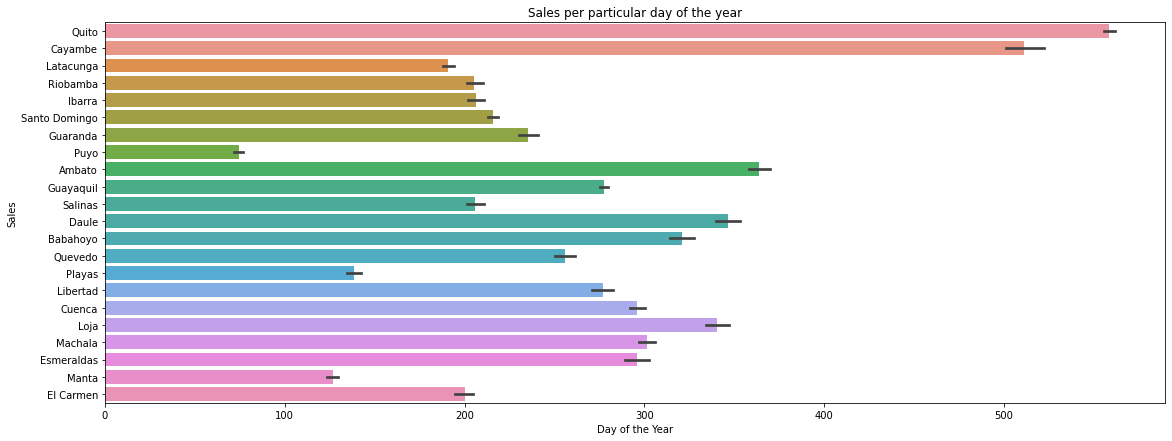

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
#Creating the dataframe with the sum of prices.
plt.figure(figsize=(19,7))
df_3 = df3.groupby('sales').sum()
df_3 = df_3.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df3['sales'], y = df3['city'], data=df_3)
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Cities with the highest sales')
plt.show()